<a href="https://colab.research.google.com/github/Harshini-19-git/projects/blob/main/diabetes_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:

import kagglehub

# Download latest version
path = kagglehub.dataset_download("akshaydattatraykhare/diabetes-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/akshaydattatraykhare/diabetes-dataset/versions/1


In [ ]:
dataframe=pd.read_csv("/content/diabetes_ds.csv") # path is exactly coped from left side copy path of diabetes file.
dataframe.head()

In [ ]:
dataframe.columns

In [ ]:
dataframe.dtypes

MISSING VALUES IN DATAFRAME

In [ ]:
dataframe.isnull().sum()

In [ ]:
dataframe.head(20)

In [ ]:
dataframe.shape



*   AS the target column available--->SUPERVISED LEARNING ALGO
*   TARGET OUTPUT COLUMN : [0,1]--->BINARY CLASSIFICATION



DATA IMPUTATION OF 0'S IN EVERYY FEATURE:

In [ ]:
dataframe.corr()

In [ ]:
plt.figure(figsize=(10,10))
ax=sns.heatmap(dataframe.corr(),annot=True)
plt.savefig("heatmap of corr.jpg")
plt.show()

HEAT MAP


DESCRIPITVE STATISTICS OF GIVEN DATA

In [ ]:
dataframe.describe()

**OTHER WAYS OF FINDING NULL VALUES:**
->use describe(gives count of that col) & shape(gives rows & cols) :)**bold text**

In [ ]:
sns.distplot(dataframe.BloodPressure)

many zeroes.....LOOKS LIKE SYMMETRIC DISTBN:--->Imputation wr.t. mean

In [ ]:
sns.distplot(dataframe.	Pregnancies	)

its right skewed--->MEDIAN works!!!

In [ ]:
sns.distplot(dataframe.Insulin) # right skewes--->imputation wr.rt median

In [ ]:
#insulin is right skewed--->OUTLIERS EXISTS--->MEDIAN as data imputer
dataframe["Insulin"]=dataframe["Insulin"].replace(0,dataframe["Insulin"].median())

In [ ]:
dataframe.head(20)

In [ ]:
dataframe.describe()

In [ ]:
dataframe.columns

In [ ]:
sns.distplot(dataframe.Glucose) # mean

In [ ]:
sns.distplot(dataframe.SkinThickness) # almost normal---->MEAN works!!

In [ ]:
sns.distplot(dataframe.DiabetesPedigreeFunction) # right skewed --->median works

In [ ]:
sns.distplot(dataframe.Age) # right skewed -->median wroks

In [ ]:
sns.distplot(dataframe.BMI) # almost symmetric---->mean works

In [ ]:
sns.distplot(dataframe.BloodPressure)

# **DATA IMPUTATION USING MEAN & MODE**

In [ ]:
dataframe["Insulin"]=dataframe["Insulin"].replace(0,dataframe["Insulin"].median())
dataframe["Glucose"]=dataframe["Glucose"].replace(0,dataframe["Glucose"].mean())
dataframe["Age"]=dataframe["Age"].replace(0,dataframe["Age"].median())
dataframe["BMI"]=dataframe["BMI"].replace(0,dataframe["BMI"].mean())
dataframe["DiabetesPedigreeFunction"]=dataframe["DiabetesPedigreeFunction"].replace(0,dataframe["DiabetesPedigreeFunction"].median())
dataframe["SkinThickness"]=dataframe["SkinThickness"].replace(0,dataframe["SkinThickness"].mean())
dataframe["Pregnancies"]=dataframe["Pregnancies"].replace(0,dataframe["Pregnancies"].median())
dataframe["BloodPressure"]=dataframe["BloodPressure"].replace(0,dataframe["BloodPressure"].mean())


In [ ]:
dataframe.head(25)

In [ ]:
dataframe.describe()

In [ ]:
x=dataframe.drop(columns="Outcome",axis=1) # given raw data split
y=dataframe["Outcome"]

In [ ]:
y

**OUTLIER DETECTION**

In [ ]:
fig,ax=plt.subplots(figsize=(10,10)) # created emty plot with axis as ax
sns.boxplot(data=x,ax=ax)# telling to creat boxplot on above created ax with data as input values
plt.savefig("boxplot_on_input.jpg")
plt.show()

Code for outlier detection

In [ ]:
x.columns

In [ ]:
cols=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
for col in cols:
  q1=x[col].quantile(0.25)
  q3=x[col].quantile(0.75)
  IQR=q3-q1
  upper_bound=(1.5*IQR)+q3
  lower_bound=q1-(1.5*IQR)
  mask=(x[col]>=lower_bound ) & (x[col]<=upper_bound) #creates boolean series (true/false) for col in x

In [ ]:
mask

**points which doesnt belong to mask are outlier**

*so its like...1st we filter out all rows wheenever we encounter outlier accordingly.....later at the end of for loop...mask contains only the last column info...so that we could know...which rows are removed(having 1 column is enough to calculate no.of rows !!!:)iykyk)...later  since some rows are removed we need to update given predicted values where we seperated initial x as features and y as given outcome(since supervised) text*

In [ ]:
x_after_outlier_det=x[mask]
y_after_outlier_det=y[mask]
y_after_outlier_det.shape
 #determines the final shape after removing outliers

(759,)

Dont focus on 100% removal of outliers........try to minimize no.of outliers

**STANDARDIZATION USING STANDARD SCALER MODEL**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()# scaler acts as model!!
x_scaled=scaler.fit_transform(x_after_outlier_det)
x_scaled

array([[ 0.57322173,  0.87008298, -0.01698412, ...,  0.16090077,
         0.46879263,  1.54828125],
       [-1.0797999 , -1.20656984, -0.51093456, ..., -0.85816238,
        -0.36177415, -0.16252742],
       [ 1.23443039,  2.02377899, -0.6755847 , ..., -1.33857787,
         0.60421113, -0.07248486],
       ...,
       [ 0.2426174 , -0.01991109, -0.01698412, ..., -0.91639456,
        -0.68075995, -0.25256998],
       [-1.0797999 ,  0.14490263, -1.00488499, ..., -0.3486308 ,
        -0.36779275,  1.27815356],
       [-1.0797999 , -0.9428679 , -0.18163427, ..., -0.30495667,
        -0.47010895, -0.88286791]])

WHY NORMALIZATION IMP?
->to reduce biasness in model

In [ ]:
x_scaled=pd.DataFrame(x_scaled,columns=cols)# to see change in values...converted x_scaled to a df so that we can use inbulit describe method
x_scaled.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02
mean,1.029772e-16,-3.978665e-17,-3.042508e-17,-2.012736e-16,-4.329724e-17,5.546727e-16,4.914821e-17,1.591466e-16
std,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00
min,-1.079800e+00,-2.558042e+00,-3.968588e+00,-2.036537e+00,-7.684941e-01,-2.081038e+00,-1.183313e+00,-1.062953e+00
25%,-7.491956e-01,-7.286101e-01,-6.755847e-01,-6.347079e-01,-6.126688e-01,-7.125819e-01,-6.852739e-01,-7.928253e-01
50%,-4.185912e-01,-1.517621e-01,-1.698412e-02,-3.795847e-01,-5.607270e-01,-7.202795e-02,-3.045975e-01,-3.426125e-01
75%,5.732217e-01,6.063810e-01,6.416165e-01,5.524511e-01,3.222827e-01,5.976421e-01,4.627740e-01,6.478556e-01
max,4.209869e+00,2.551183e+00,4.099270e+00,7.490939e+00,7.088876e+00,5.037846e+00,5.864467e+00,2.988962e+00


In [ ]:
x_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.573222,0.870083,-0.016984,0.863130,-0.612669,0.160901,0.468793,1.548281
1,-1.079800,-1.206570,-0.510935,0.241772,-0.612669,-0.858162,-0.361774,-0.162527
2,1.234430,2.023779,-0.675585,-0.634708,-0.612669,-1.338578,0.604211,-0.072485
3,-1.079800,-1.074719,-0.510935,-0.379585,-0.012978,-0.639792,-0.915485,-1.062953
4,-0.418591,0.507493,-2.651386,0.863130,0.685875,1.543915,5.467240,0.017558


IMG SHOWS boxplot after standardizatiion

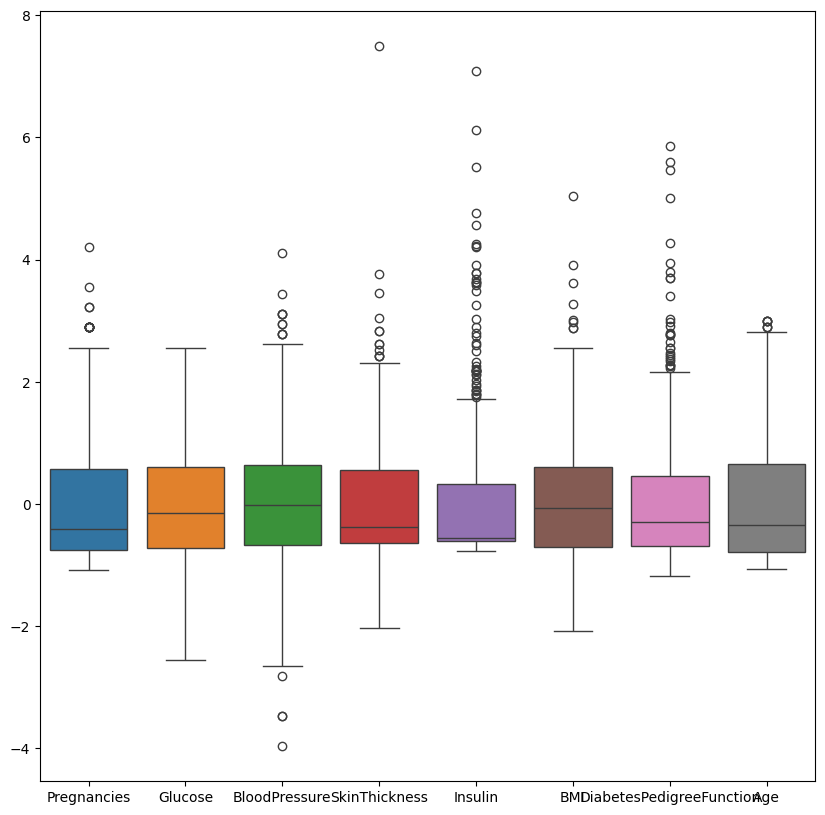

In [ ]:
fig,ax=plt.subplots(figsize=(10,10))
sns.boxplot(data=x_scaled,ax=ax)
plt.savefig("boxplot_after scaling.jpg")
plt.show()

still outliers exists ....can change method!!

In [ ]:
dataframe.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
cols=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

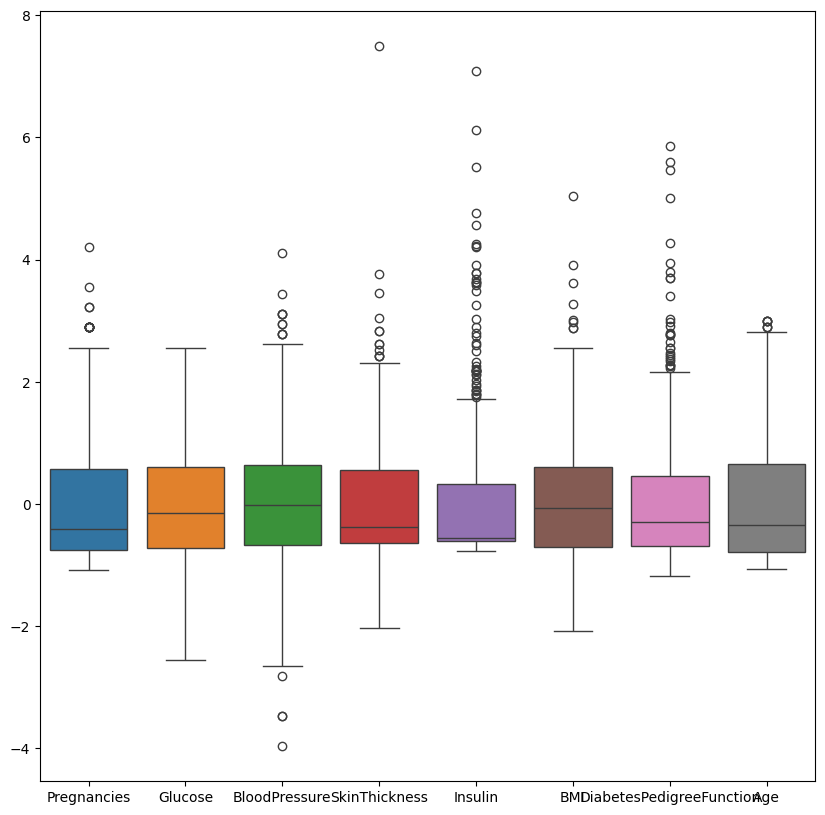

In [ ]:
fig,ax=plt.subplots(figsize=(10,10))
sns.boxplot(data=x_scaled,ax=ax)
plt.savefig("boxplot_after scaling.jpg")
plt.show()

CAN SEE MEAN---->0 & STANDARD DEVIATION----->1 (almost)

In [ ]:
x_scaled=pd.DataFrame(x_scaled,columns=cols)# to see change in values...converted x_scaled to a df so that we can use inbulit describe method
x_scaled.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02
mean,1.029772e-16,-3.978665e-17,-3.042508e-17,-2.012736e-16,-4.329724e-17,5.546727e-16,4.914821e-17,1.591466e-16
std,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00
min,-1.079800e+00,-2.558042e+00,-3.968588e+00,-2.036537e+00,-7.684941e-01,-2.081038e+00,-1.183313e+00,-1.062953e+00
25%,-7.491956e-01,-7.286101e-01,-6.755847e-01,-6.347079e-01,-6.126688e-01,-7.125819e-01,-6.852739e-01,-7.928253e-01
50%,-4.185912e-01,-1.517621e-01,-1.698412e-02,-3.795847e-01,-5.607270e-01,-7.202795e-02,-3.045975e-01,-3.426125e-01
75%,5.732217e-01,6.063810e-01,6.416165e-01,5.524511e-01,3.222827e-01,5.976421e-01,4.627740e-01,6.478556e-01
max,4.209869e+00,2.551183e+00,4.099270e+00,7.490939e+00,7.088876e+00,5.037846e+00,5.864467e+00,2.988962e+00


In [ ]:
y_after_outlier_det.value_counts()

,count
Outcome,
0,493
1,266


In [ ]:
y_after_outlier_det.value_counts()#after outliers handling
x_after_outlier_det

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,30.5,33.6,0.627,50
1,1,85.0,66.0,29.000000,30.5,26.6,0.351,31
2,8,183.0,64.0,20.536458,30.5,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.0,28.1,0.167,21
4,3,137.0,40.0,35.000000,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.0,32.9,0.171,63
764,2,122.0,70.0,27.000000,30.5,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.0,26.2,0.245,30
766,1,126.0,60.0,20.536458,30.5,30.1,0.349,47


In [ ]:
y.value_counts()#before outliers

,count
Outcome,
0,500
1,268


In [ ]:
x_scaled.shape

(759, 8)

**QUANTILE APPROACH IN OUTLIER HANDLING**

In [ ]:
x_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.573222,0.870083,-0.016984,0.863130,-0.612669,0.160901,0.468793,1.548281
1,-1.079800,-1.206570,-0.510935,0.241772,-0.612669,-0.858162,-0.361774,-0.162527
2,1.234430,2.023779,-0.675585,-0.634708,-0.612669,-1.338578,0.604211,-0.072485
3,-1.079800,-1.074719,-0.510935,-0.379585,-0.012978,-0.639792,-0.915485,-1.062953
4,-0.418591,0.507493,-2.651386,0.863130,0.685875,1.543915,5.467240,0.017558
...,...,...,...,...,...,...,...,...
754,1.895639,-0.679166,0.312316,2.209403,0.799202,0.058994,-0.903448,2.718835
755,-0.749196,0.013052,-0.181634,0.034653,-0.612669,0.626758,-0.394876,-0.522698
756,0.242617,-0.019911,-0.016984,-0.379585,0.157014,-0.916395,-0.680760,-0.252570
757,-1.079800,0.144903,-1.004885,-0.634708,-0.612669,-0.348631,-0.367793,1.278154


In [ ]:
datanew.shape


(721, 8)

In [ ]:
y_after_outlier_det.shape

(759,)

In [ ]:
x_scaled.reset_index(drop=True,inplace=True)
y_after_outlier_det.reset_index(drop=True,inplace=True)

In [ ]:
q=x_scaled["Insulin"].quantile(.95)
mask=x_scaled["Insulin"]<q
mask.shape

(759,)

In [ ]:
datanew=x_scaled[mask]# mask is apllied w.r.t, insulin only here!!.....so this mask of insulin is applied on normalized x.
y_after_outlier_det=y_after_outlier_det[mask]


In [ ]:
y_after_outlier_det.shape

(721,)

In [ ]:
datanew.shape

(721, 8)

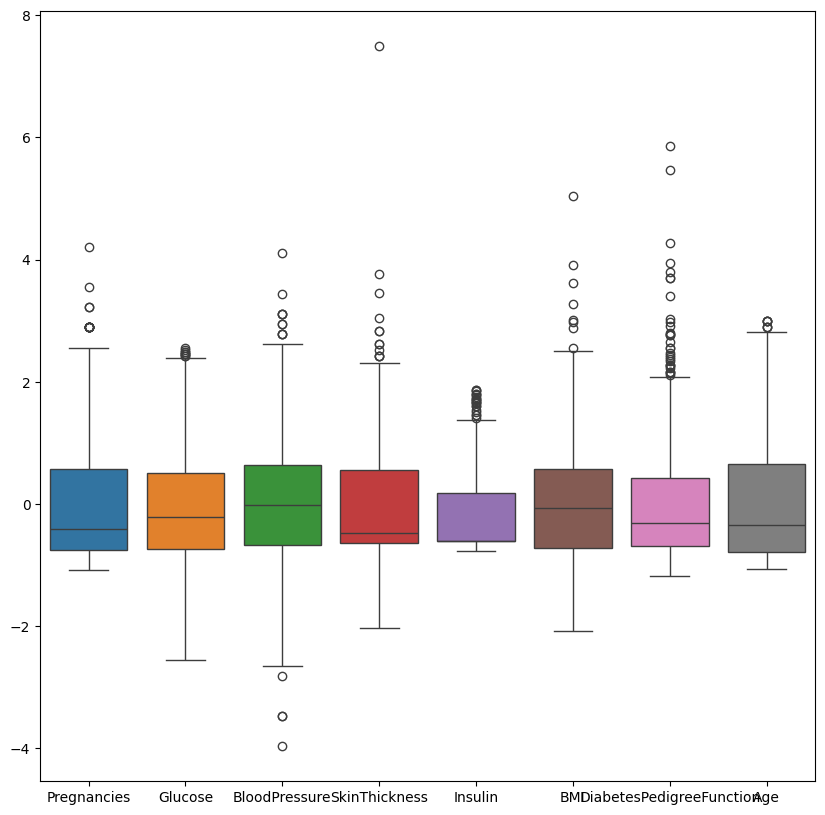

In [ ]:
fig,ax=plt.subplots(figsize=(10,10))
sns.boxplot(datanew,ax=ax)
plt.savefig("boxplot_after scaling.jpg")
plt.show()

# MODEL TRAINING

currently in our hands we have x_scaled + quartile(only w.r.t insulin...both x_scaled & y_after outliers shape is changed w.r.t to this mask of insulin)
I.E WITH 721 DATAPOINTS......
**finally**:after all above total work...datanew(act as input to model)
y_after_outliers(act as predicted outputs given)

*train_test_split function*

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(datanew,y_after_outlier_det,test_size=0.33,random_state=42)
#almost 33% of data for testing
#random state should be given a fixed number ,if 2 ppl are working under same split of train and test data

*Without a fixed random_state, every time you run the split, the training and testing sets will be different.
If two people are working on the same project but use different random splits, their models might have different performances, making comparison difficult.*

In [ ]:
x_train.shape

(483, 8)

In [ ]:
x_test.shape

(238, 8)

In [ ]:
y_train.shape

(483,)

In [ ]:
y_test.shape

(238,)

In [ ]:
y_train.value_counts()

,count
Outcome,
0,318
1,165


we observe biasness towards 0 class than 1 class

**So its DATA IMBALANCING**

techniqe:**SMOTE** method

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)
#check resampled class distribution
print("RESAMPPLED CLASS DISTRIBUTION")
print(pd.Series(y_train_smote.value_counts()))


RESAMPPLED CLASS DISTRIBUTION
Outcome
0    318
1    318
Name: count, dtype: int64


In [ ]:
print(pd.Series(x_train_smote.value_counts()))

Pregnancies  Glucose    BloodPressure  SkinThickness  Insulin    BMI        DiabetesPedigreeFunction  Age      
-1.079800    -1.668048   0.476966       2.416523      -0.475731   0.102669  -0.148114                 -1.062953    1
 0.573222    -1.140644   0.641616      -0.634708      -0.612669  -1.353136  -1.165257                 -0.072485    1
 0.431784     2.334720  -0.197387      -0.634708      -0.612669  -0.310018  -0.505659                 -0.066223    1
 0.447413     0.471323   0.131647       0.093320       0.434819   0.212428   0.005727                 -0.479672    1
 0.451035     1.798198   0.217108       1.440810       0.573166   0.105771   1.103614                  0.074322    1
                                                                                                                  ..
-0.418591    -0.646203   1.135567      -1.000942       0.090906  -0.465095   0.673425                 -0.522698    1
             -0.613240  -0.016984       0.345332       0.534772  -0.7

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_train_smote,y_train_smote)

LogisticRegression()

**MODEL PREDICTIONS & EVALUATION**

In [ ]:
y_prediction=classifier.predict(x_test)
print(y_prediction)

[0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0
 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0
 0 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1
 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1
 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 1 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 1
 0 0 1 0 1 1 0 0 1 0 0 1 1 1 1 1]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_prediction)

0.7689075630252101

# To optimize we can go for


1.   Tree based algos
2.   hyper parameter optimization




In [ ]:
from sklearn.metrics import classification_report
target_names=["non-diab","diab"]
print(classification_report(y_test,y_prediction,target_names=target_names))

              precision    recall  f1-score   support

    non-diab       0.87      0.77      0.82       159
        diab       0.62      0.76      0.69        79

    accuracy                           0.77       238
   macro avg       0.75      0.77      0.75       238
weighted avg       0.79      0.77      0.77       238



In [ ]:
import pickle
pickle.dump(classifier,open("classification_model.pkl","wb"))

In [ ]:
classify_model=pickle.load(open("classification_model.pkl","rb"))
classify_model.predict(x_test)

array([0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])